In [60]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy.stats import linregress

In [61]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [62]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [63]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in lat_lngs:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [64]:
cities

['ostrovnoy',
 'butaritari',
 'kavaratti',
 'hermanus',
 'marrakesh',
 'storforshei',
 'marcona',
 'bredasdorp',
 'salekhard',
 'rio grande',
 'nanortalik',
 'kapaa',
 'kirya',
 'lebu',
 'albany',
 'bluff',
 'lata',
 'chabahar',
 'bowen',
 'manta',
 'turukhansk',
 'faanui',
 'kodiak',
 'makakilo city',
 'gao',
 'broome',
 'khatanga',
 'puerto escondido',
 'georgetown',
 'vaini',
 'carahue',
 'nowogard',
 'fort dodge',
 'mataura',
 'barentsburg',
 'chagda',
 'thompson',
 'qaanaaq',
 'rikitea',
 'lompoc',
 'hasaki',
 'colares',
 'kisangani',
 'bara',
 'new glasgow',
 'barrow',
 'mahebourg',
 'jamestown',
 'fare',
 'cumaribo',
 'busselton',
 'hilo',
 'nishihara',
 'saleaula',
 'atuona',
 'luderitz',
 'paamiut',
 'provideniya',
 'nizhneyansk',
 'egvekinot',
 'ugoofaaru',
 'kizilskoye',
 'paita',
 'jumla',
 'ambanja',
 'contamana',
 'taolanaro',
 'sheksna',
 'beringovskiy',
 'airai',
 'cape town',
 'bambous virieux',
 'sorong',
 'victoria',
 'kaitangata',
 'amahai',
 'dzaoudzi',
 'kismayo',

In [65]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [66]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=54be4259be8a1d9a0234c02433047e02


In [67]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [68]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [69]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 13 | ostrovnoy
Processing Record 2 of Set 13 | butaritari
Processing Record 3 of Set 13 | kavaratti
Processing Record 4 of Set 13 | hermanus
Processing Record 5 of Set 13 | marrakesh
Processing Record 6 of Set 13 | storforshei
Processing Record 7 of Set 13 | marcona
City not found. Skipping...
Processing Record 8 of Set 13 | bredasdorp
Processing Record 9 of Set 13 | salekhard
Processing Record 10 of Set 13 | rio grande
Processing Record 11 of Set 13 | nanortalik
Processing Record 12 of Set 13 | kapaa
Processing Record 13 of Set 13 | kirya
Processing Record 14 of Set 13 | lebu
Processing Record 15 of Set 13 | albany
Processing Record 16 of Set 13 | bluff
Processing Record 17 of Set 13 | lata
Processing Record 18 of Set 13 | chabahar
Processing Record 19 of Set 13 | bowen
Processing Record 20 of Set 13 | manta
Processing Record 21 of Set 13 | turukhansk
Processing Record 22 of Set 13 | faanui
Processing Record 23 of Set 13 | kodiak
Processing Record 24 of Set 

Processing Record 33 of Set 16 | baruun-urt
Processing Record 34 of Set 16 | kaeo
Processing Record 35 of Set 16 | cururupu
Processing Record 36 of Set 16 | arawa
Processing Record 37 of Set 16 | qasigiannguit
Processing Record 38 of Set 16 | caceres
Processing Record 39 of Set 16 | santa rita
Processing Record 40 of Set 16 | kumo
Processing Record 41 of Set 16 | sao filipe
Processing Record 42 of Set 16 | zonguldak
Processing Record 43 of Set 16 | lagoa
Processing Record 44 of Set 16 | xapuri
Processing Record 45 of Set 16 | burica
City not found. Skipping...
Processing Record 46 of Set 16 | bethel
Processing Record 47 of Set 16 | sorland
Processing Record 48 of Set 16 | iqaluit
Processing Record 49 of Set 16 | dongsheng
Processing Record 50 of Set 16 | anshun
Processing Record 1 of Set 17 | ilulissat
Processing Record 2 of Set 17 | marzuq
Processing Record 3 of Set 17 | kieta
Processing Record 4 of Set 17 | lampa
Processing Record 5 of Set 17 | vanimo
Processing Record 6 of Set 17 | 

Processing Record 21 of Set 20 | buin
Processing Record 22 of Set 20 | ambulu
Processing Record 23 of Set 20 | riyadh
Processing Record 24 of Set 20 | ambunti
Processing Record 25 of Set 20 | taber
Processing Record 26 of Set 20 | gangotri
City not found. Skipping...
Processing Record 27 of Set 20 | quesnel
Processing Record 28 of Set 20 | sao raimundo nonato
Processing Record 29 of Set 20 | ikole
City not found. Skipping...
Processing Record 30 of Set 20 | kallifitos
Processing Record 31 of Set 20 | bengkulu
Processing Record 32 of Set 20 | kasaragod
Processing Record 33 of Set 20 | mount pleasant
Processing Record 34 of Set 20 | palatka
Processing Record 35 of Set 20 | indramayu
Processing Record 36 of Set 20 | rosario do sul
Processing Record 37 of Set 20 | shimoda
Processing Record 38 of Set 20 | rancho cucamonga
Processing Record 39 of Set 20 | liverpool
Processing Record 40 of Set 20 | saint-georges
Processing Record 41 of Set 20 | mys shmidta
City not found. Skipping...
Processi

Processing Record 9 of Set 24 | dumai
Processing Record 10 of Set 24 | barinitas
Processing Record 11 of Set 24 | pundaguitan
Processing Record 12 of Set 24 | tonj
Processing Record 13 of Set 24 | touba
Processing Record 14 of Set 24 | wuwei
Processing Record 15 of Set 24 | devrek
Processing Record 16 of Set 24 | dalby
Processing Record 17 of Set 24 | aquiraz
Processing Record 18 of Set 24 | groton
Processing Record 19 of Set 24 | sipka
City not found. Skipping...
Processing Record 20 of Set 24 | chifeng
Processing Record 21 of Set 24 | maarianhamina
Processing Record 22 of Set 24 | belyy gorodok
Processing Record 23 of Set 24 | nyurba
Processing Record 24 of Set 24 | dundee
Processing Record 25 of Set 24 | lakselv
Processing Record 26 of Set 24 | kijang
Processing Record 27 of Set 24 | kiama
Processing Record 28 of Set 24 | zhuhai
Processing Record 29 of Set 24 | phaltan
Processing Record 30 of Set 24 | ust-koksa
Processing Record 31 of Set 24 | pouembout
Processing Record 32 of Set 2

In [70]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ostrovnoy,68.05,39.51,30.58,97,99,8.61,RU,2020-04-18 21:39:56
1,Butaritari,3.07,172.79,83.21,77,76,15.82,KI,2020-04-18 21:39:56
2,Kavaratti,10.57,72.64,84.13,71,1,4.56,IN,2020-04-18 21:44:11
3,Hermanus,-34.42,19.23,64.00,54,69,1.01,ZA,2020-04-18 21:44:11
4,Marrakesh,31.63,-8.01,60.80,77,75,4.70,MA,2020-04-18 21:44:04
5,Storforshei,66.40,14.52,37.99,92,99,7.00,NO,2020-04-18 21:44:11
6,Bredasdorp,-34.53,20.04,53.60,93,46,4.70,ZA,2020-04-18 21:40:01
7,Salekhard,66.53,66.60,32.65,96,100,5.26,RU,2020-04-18 21:44:12
8,Rio Grande,-32.03,-52.10,68.00,85,0,11.39,BR,2020-04-18 21:41:30
9,Nanortalik,60.14,-45.24,29.50,91,82,3.91,GL,2020-04-18 21:44:13


In [71]:
city_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        559 non-null    object 
 1   Lat         559 non-null    float64
 2   Lng         559 non-null    float64
 3   Max Temp    559 non-null    float64
 4   Humidity    559 non-null    int64  
 5   Cloudiness  559 non-null    int64  
 6   Wind Speed  559 non-null    float64
 7   Country     559 non-null    object 
 8   Date        559 non-null    object 
dtypes: float64(4), int64(2), object(3)
memory usage: 39.4+ KB


In [72]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [73]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2020-04-18 21:39:56,68.05,39.51,30.58,97,99,8.61
1,Butaritari,KI,2020-04-18 21:39:56,3.07,172.79,83.21,77,76,15.82
2,Kavaratti,IN,2020-04-18 21:44:11,10.57,72.64,84.13,71,1,4.56
3,Hermanus,ZA,2020-04-18 21:44:11,-34.42,19.23,64.00,54,69,1.01
4,Marrakesh,MA,2020-04-18 21:44:04,31.63,-8.01,60.80,77,75,4.70


In [76]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [77]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [78]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1587246470.2895477

In [79]:
today = time.strftime("%x")
today

'04/18/20'

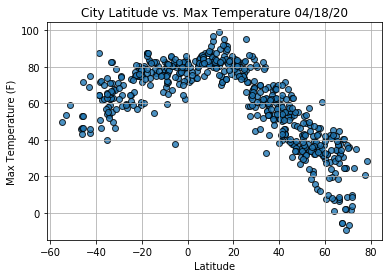

In [80]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

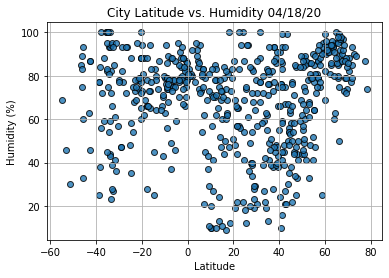

In [81]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

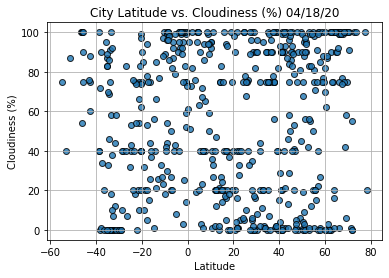

In [82]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

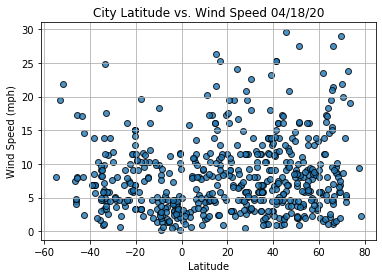

In [83]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [84]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.title(title)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [85]:
index13 = city_data_df.loc[13]
index13

City                       Albany
Country                        US
Date          2020-04-18 21:43:48
Lat                          42.6
Lng                        -73.97
Max Temp                       46
Humidity                       67
Cloudiness                     93
Wind Speed                   1.99
Name: 13, dtype: object

In [86]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
554     True
555     True
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [87]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2020-04-18 21:39:56,68.05,39.51,30.58,97,99,8.61
1,Butaritari,KI,2020-04-18 21:39:56,3.07,172.79,83.21,77,76,15.82
2,Kavaratti,IN,2020-04-18 21:44:11,10.57,72.64,84.13,71,1,4.56
4,Marrakesh,MA,2020-04-18 21:44:04,31.63,-8.01,60.80,77,75,4.70
5,Storforshei,NO,2020-04-18 21:44:11,66.40,14.52,37.99,92,99,7.00
...,...,...,...,...,...,...,...,...,...
554,Troitsko-Pechorsk,RU,2020-04-18 21:46:44,62.71,56.20,34.25,94,100,1.79
555,Shubarkuduk,KZ,2020-04-18 21:46:44,49.14,56.49,46.35,84,81,8.52
556,Lenoir City,US,2020-04-18 21:46:44,35.80,-84.26,62.01,46,0,1.01
557,Anta,IN,2020-04-18 21:46:44,25.15,76.30,83.10,18,78,8.46


In [88]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ostrovnoy,RU,2020-04-18 21:39:56,68.05,39.51,30.58,97,99,8.61
1,Butaritari,KI,2020-04-18 21:39:56,3.07,172.79,83.21,77,76,15.82
2,Kavaratti,IN,2020-04-18 21:44:11,10.57,72.64,84.13,71,1,4.56
3,Hermanus,ZA,2020-04-18 21:44:11,-34.42,19.23,64.00,54,69,1.01
4,Marrakesh,MA,2020-04-18 21:44:04,31.63,-8.01,60.80,77,75,4.70
...,...,...,...,...,...,...,...,...,...
554,Troitsko-Pechorsk,RU,2020-04-18 21:46:44,62.71,56.20,34.25,94,100,1.79
555,Shubarkuduk,KZ,2020-04-18 21:46:44,49.14,56.49,46.35,84,81,8.52
556,Lenoir City,US,2020-04-18 21:46:44,35.80,-84.26,62.01,46,0,1.01
557,Anta,IN,2020-04-18 21:46:44,25.15,76.30,83.10,18,78,8.46


In [89]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

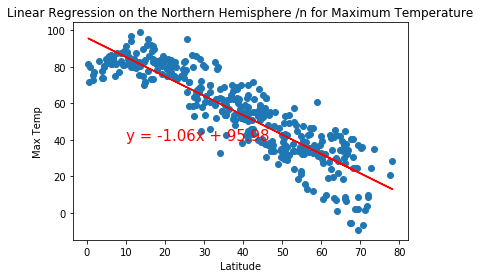

In [90]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere /n for Maximum Temperature', 'Max Temp',(10,40))

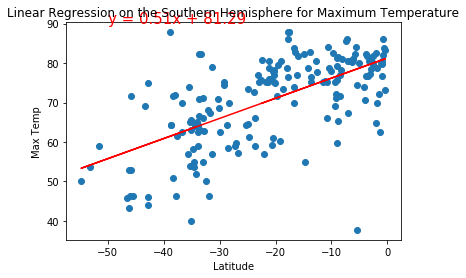

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

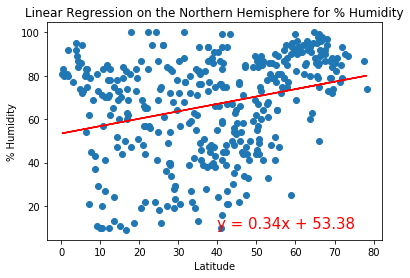

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

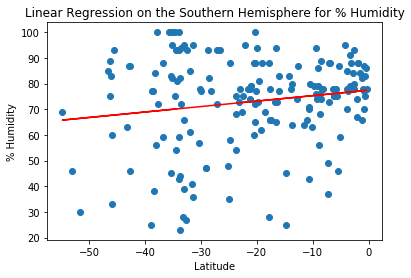

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

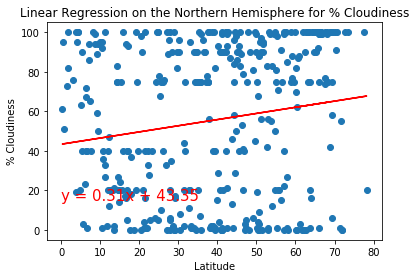

In [94]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,15))

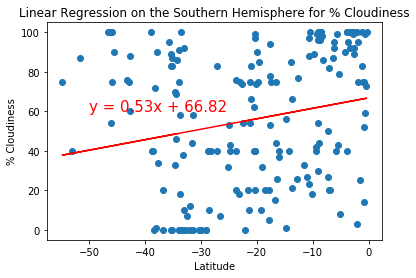

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

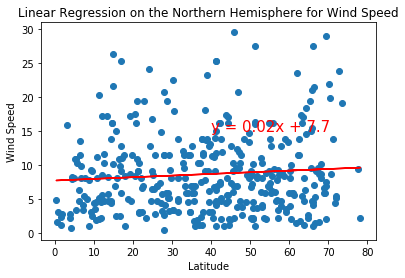

In [104]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,15))

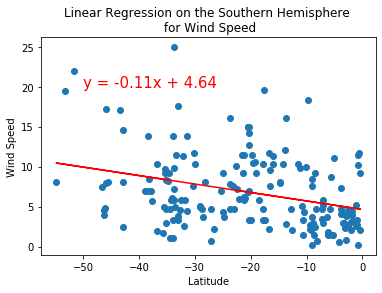

In [105]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))